In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import SGD

In [9]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [10]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [11]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [12]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [13]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [14]:
# continuing from the last nb (i.e. model29) 

In [15]:
# I'm trying the first model29 with Adam again  
# to see if it learns this time or not

# spoiler alert, it didn't 
# I'm not saving the result because I don't see how it would be helpful
# I tried changing the learning rate all the way to 0.1
# still not learning

In [16]:
# param count: 5,201
model30 = Sequential() 

model30.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
for i in range(4):
    model30.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model30.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model30.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
             metrics=['mse', 'mae'])

In [17]:
history30 = model30.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 42ms/step - loss: 17966.3359 - mse: 325471680.0000 - mae: 13518.6904 - val_loss: 17593.4023 - val_mse: 310366464.0000 - val_mae: 12655.4893
Epoch 2/300
14/14 [==============================] - 0s 12ms/step - loss: 17966.8281 - mse: 325464768.0000 - mae: 13518.4395 - val_loss: 17592.8809 - val_mse: 310348128.0000 - val_mae: 12654.8145
Epoch 3/300
14/14 [==============================] - 0s 10ms/step - loss: 17936.6055 - mse: 325407616.0000 - mae: 13516.4746 - val_loss: 17589.0039 - val_mse: 310211552.0000 - val_mae: 12649.8164
Epoch 4/300
14/14 [==============================] - 0s 11ms/step - loss: 17872.2910 - mse: 325041344.0000 - mae: 13503.7910 - val_loss: 17566.6387 - val_mse: 309424352.0000 - val_mae: 12621.0410
Epoch 5/300
14/14 [==============================] - 0s 15ms/step - loss: 17860.4160 - mse: 323243264.0000 - mae: 13440.1846 - val_loss: 17464.8359 - val_mse: 305853376.0000 - val_mae: 12489.8740
Epoch 6/300
14/14 [=

14/14 [==============================] - 0s 9ms/step - loss: 11079.1270 - mse: 124102920.0000 - mae: 8809.7822 - val_loss: 11194.6025 - val_mse: 125607944.0000 - val_mae: 8537.1035
Epoch 44/300
14/14 [==============================] - 0s 6ms/step - loss: 11091.2939 - mse: 124767048.0000 - mae: 9100.2861 - val_loss: 11200.5479 - val_mse: 125715144.0000 - val_mae: 8949.2451
Epoch 45/300
14/14 [==============================] - 0s 5ms/step - loss: 11070.0791 - mse: 123822760.0000 - mae: 8814.3145 - val_loss: 11178.7656 - val_mse: 125250304.0000 - val_mae: 8556.0381
Epoch 46/300
14/14 [==============================] - 0s 5ms/step - loss: 11049.3799 - mse: 123319232.0000 - mae: 8894.3408 - val_loss: 11184.0977 - val_mse: 125346384.0000 - val_mae: 8925.6357
Epoch 47/300
14/14 [==============================] - 0s 14ms/step - loss: 11053.7061 - mse: 123634784.0000 - mae: 9195.5576 - val_loss: 11165.6123 - val_mse: 124940104.0000 - val_mae: 8791.0439
Epoch 48/300
14/14 [======================

14/14 [==============================] - 0s 8ms/step - loss: 9661.9414 - mse: 94839424.0000 - mae: 7607.7607 - val_loss: 9724.0840 - val_mse: 94755296.0000 - val_mae: 7733.1782
Epoch 86/300
14/14 [==============================] - 0s 7ms/step - loss: 9458.1602 - mse: 90309016.0000 - mae: 7476.0054 - val_loss: 9457.6094 - val_mse: 89646752.0000 - val_mae: 7197.0718
Epoch 87/300
14/14 [==============================] - 0s 6ms/step - loss: 9193.5244 - mse: 85125280.0000 - mae: 7162.9404 - val_loss: 9176.2998 - val_mse: 84394408.0000 - val_mae: 7120.6665
Epoch 88/300
14/14 [==============================] - 0s 6ms/step - loss: 8847.2764 - mse: 79237176.0000 - mae: 6865.0596 - val_loss: 8801.7695 - val_mse: 77663200.0000 - val_mae: 6497.2197
Epoch 89/300
14/14 [==============================] - 0s 6ms/step - loss: 8493.3789 - mse: 72516480.0000 - mae: 6369.7822 - val_loss: 8532.3252 - val_mse: 72983536.0000 - val_mae: 7053.8994
Epoch 90/300
14/14 [==============================] - 0s 7ms/st

Epoch 128/300
14/14 [==============================] - 0s 6ms/step - loss: 6110.3569 - mse: 37978440.0000 - mae: 3997.4912 - val_loss: 5843.4258 - val_mse: 34317876.0000 - val_mae: 3976.7766
Epoch 129/300
14/14 [==============================] - 0s 7ms/step - loss: 6084.1865 - mse: 37931244.0000 - mae: 4054.9836 - val_loss: 5906.7524 - val_mse: 35074276.0000 - val_mae: 3599.3682
Epoch 130/300
14/14 [==============================] - 0s 8ms/step - loss: 6105.2490 - mse: 37899508.0000 - mae: 4203.4204 - val_loss: 5888.5322 - val_mse: 34858536.0000 - val_mae: 3571.8831
Epoch 131/300
14/14 [==============================] - 0s 6ms/step - loss: 6061.6357 - mse: 37496888.0000 - mae: 4046.4736 - val_loss: 5822.2798 - val_mse: 34073452.0000 - val_mae: 3934.6226
Epoch 132/300
14/14 [==============================] - 0s 7ms/step - loss: 6080.5034 - mse: 37642276.0000 - mae: 4242.8120 - val_loss: 5873.0107 - val_mse: 34676104.0000 - val_mae: 3693.0054
Epoch 133/300
14/14 [========================

Epoch 171/300
14/14 [==============================] - 0s 11ms/step - loss: 5957.7803 - mse: 35997236.0000 - mae: 4000.6951 - val_loss: 5697.8809 - val_mse: 32652192.0000 - val_mae: 3665.4089
Epoch 172/300
14/14 [==============================] - 0s 11ms/step - loss: 5985.8013 - mse: 36013812.0000 - mae: 3899.0449 - val_loss: 5705.5249 - val_mse: 32741294.0000 - val_mae: 3596.6543
Epoch 173/300
14/14 [==============================] - 0s 8ms/step - loss: 5903.7012 - mse: 35760128.0000 - mae: 3991.5256 - val_loss: 5680.3530 - val_mse: 32447032.0000 - val_mae: 3638.4648
Epoch 174/300
14/14 [==============================] - 0s 5ms/step - loss: 5912.6035 - mse: 35802756.0000 - mae: 3880.3362 - val_loss: 5695.0859 - val_mse: 32618510.0000 - val_mae: 3579.0791
Epoch 175/300
14/14 [==============================] - 0s 6ms/step - loss: 5957.1880 - mse: 36015440.0000 - mae: 3921.6514 - val_loss: 5778.6987 - val_mse: 33593924.0000 - val_mae: 3323.2661
Epoch 176/300
14/14 [======================

Epoch 214/300
14/14 [==============================] - 0s 8ms/step - loss: 5815.7808 - mse: 34346916.0000 - mae: 3780.0544 - val_loss: 5555.7031 - val_mse: 31069430.0000 - val_mae: 3536.8154
Epoch 215/300
14/14 [==============================] - 0s 6ms/step - loss: 5809.5273 - mse: 34293860.0000 - mae: 3921.5947 - val_loss: 5630.6045 - val_mse: 31914438.0000 - val_mae: 3490.8779
Epoch 216/300
14/14 [==============================] - 0s 5ms/step - loss: 5785.8672 - mse: 34645512.0000 - mae: 3610.2368 - val_loss: 5595.7349 - val_mse: 31525402.0000 - val_mae: 3371.5935
Epoch 217/300
14/14 [==============================] - 0s 5ms/step - loss: 5773.3687 - mse: 33990832.0000 - mae: 3814.8708 - val_loss: 5542.0176 - val_mse: 30913504.0000 - val_mae: 3578.7083
Epoch 218/300
14/14 [==============================] - 0s 5ms/step - loss: 5776.4409 - mse: 34021052.0000 - mae: 3977.1201 - val_loss: 5717.0620 - val_mse: 32906260.0000 - val_mae: 3262.8037
Epoch 219/300
14/14 [========================

Epoch 257/300
14/14 [==============================] - 0s 6ms/step - loss: 5653.1348 - mse: 32642604.0000 - mae: 3656.0754 - val_loss: 5535.7065 - val_mse: 30882048.0000 - val_mae: 3161.8918
Epoch 258/300
14/14 [==============================] - 0s 7ms/step - loss: 5597.7476 - mse: 32590620.0000 - mae: 3639.4465 - val_loss: 5424.5605 - val_mse: 29643180.0000 - val_mae: 3589.0850
Epoch 259/300
14/14 [==============================] - 0s 5ms/step - loss: 5639.5796 - mse: 32289002.0000 - mae: 3803.5242 - val_loss: 5515.9468 - val_mse: 30660012.0000 - val_mae: 3242.4966
Epoch 260/300
14/14 [==============================] - 0s 5ms/step - loss: 5658.0234 - mse: 32895198.0000 - mae: 3641.7825 - val_loss: 5395.2847 - val_mse: 29325046.0000 - val_mae: 3544.3279
Epoch 261/300
14/14 [==============================] - 0s 6ms/step - loss: 5641.1738 - mse: 32577320.0000 - mae: 3562.6072 - val_loss: 5432.9229 - val_mse: 29738432.0000 - val_mae: 3412.9221
Epoch 262/300
14/14 [========================

Epoch 300/300
14/14 [==============================] - 0s 7ms/step - loss: 5486.4229 - mse: 30426844.0000 - mae: 3468.3184 - val_loss: 5303.1816 - val_mse: 28365240.0000 - val_mae: 3121.3357


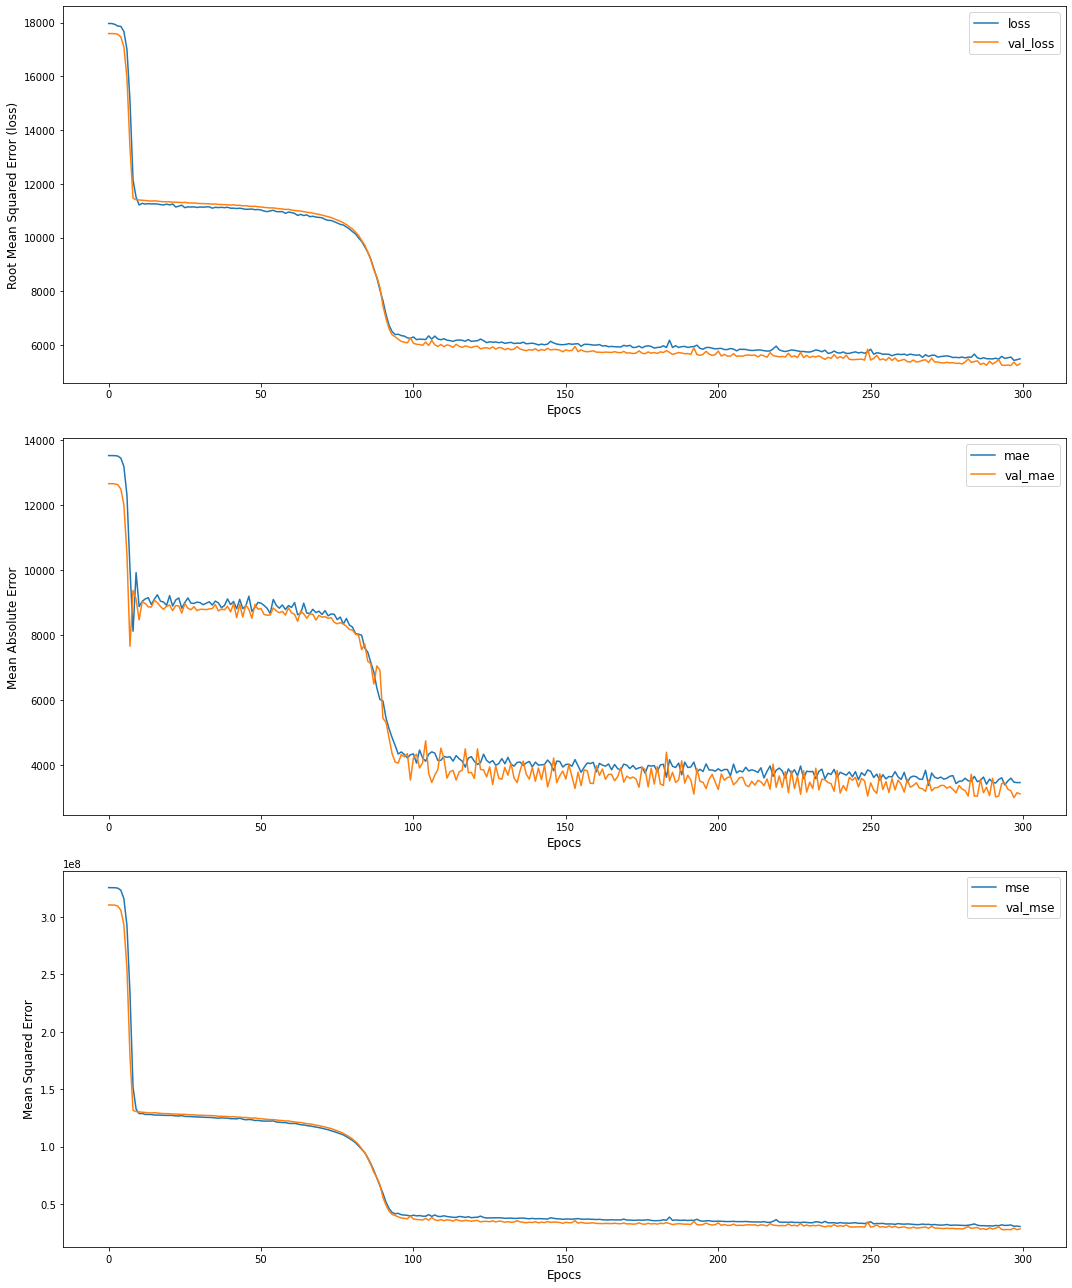

In [18]:
epoc_plots(history30)

In [19]:
y_pred30 = model30.predict(X_test)
r2_score(y_test, y_pred30) 

0.8287407229568753

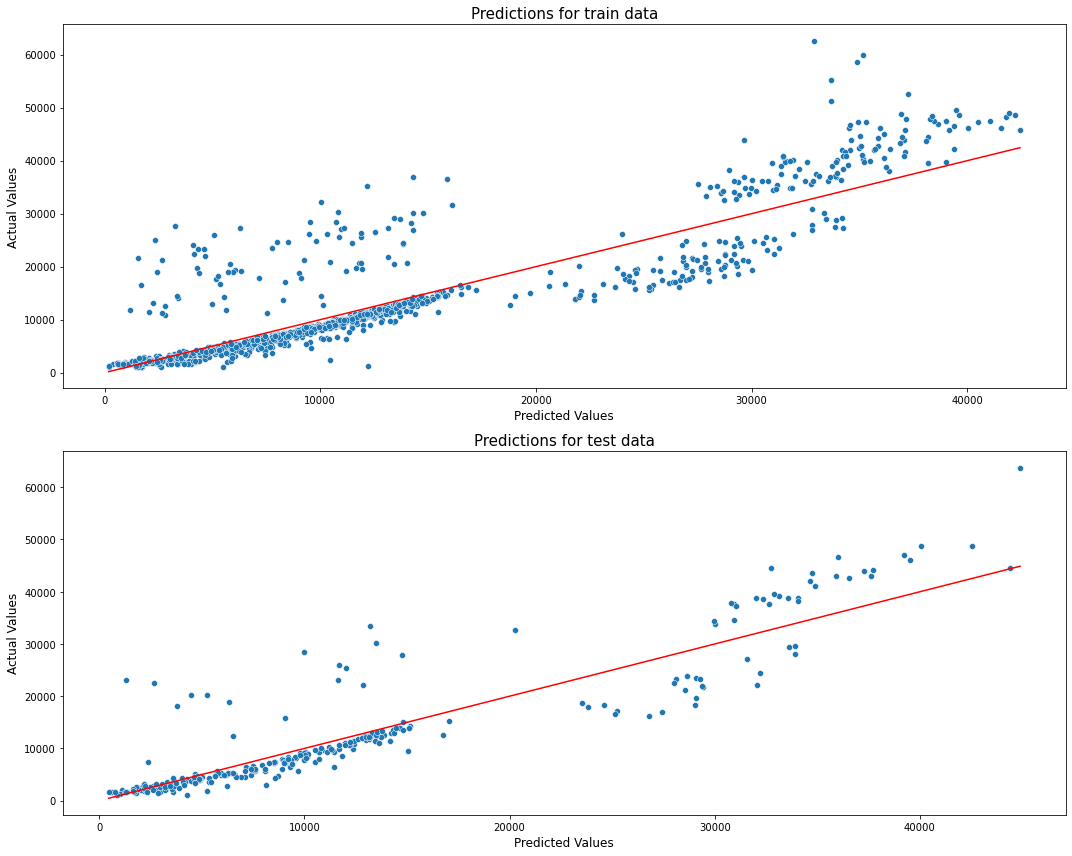

In [51]:
regression_plots(y_pred30, model30)

In [21]:
check_min_max(y_pred30)

Predicted values

max: 44877.2421875
min: 463.94635009765625

Actual values

max: 63770.42801
min: 1131.5066


In [22]:
# I was having trouble getting the model to learn 
# so I tried training a much smaller network
# surprising, even a 5k param NN is performing well 
# still has some issues, but still better than few of 
# much bigger networks

In [27]:
# param count: 5,201
model31 = Sequential() 

model31.add(Dense(100, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model31.add(Dense(75, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model31.add(Dense(50, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model31.add(Dense(25, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model31.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model31.compile(loss=root_mean_squared_error, optimizer='sgd',
             metrics=['mse', 'mae'])

In [28]:
history31 = model31.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 44ms/step - loss: 17940.3203 - mse: 325470560.0000 - mae: 13518.6475 - val_loss: 17593.3594 - val_mse: 310364960.0000 - val_mae: 12655.4307
Epoch 2/300
14/14 [==============================] - 0s 11ms/step - loss: 17921.5625 - mse: 325466176.0000 - mae: 13518.4941 - val_loss: 17593.2207 - val_mse: 310360096.0000 - val_mae: 12655.2441
Epoch 3/300
14/14 [==============================] - 0s 11ms/step - loss: 17989.9785 - mse: 325458720.0000 - mae: 13518.2207 - val_loss: 17592.8359 - val_mse: 310346528.0000 - val_mae: 12654.7441
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 17968.6055 - mse: 325293344.0000 - mae: 13512.3516 - val_loss: 17177.0293 - val_mse: 295865568.0000 - val_mae: 12119.9746
Epoch 5/300
14/14 [==============================] - 0s 13ms/step - loss: 21702.9434 - mse: 638961920.0000 - mae: 17317.4043 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 6/300
14/14 [=

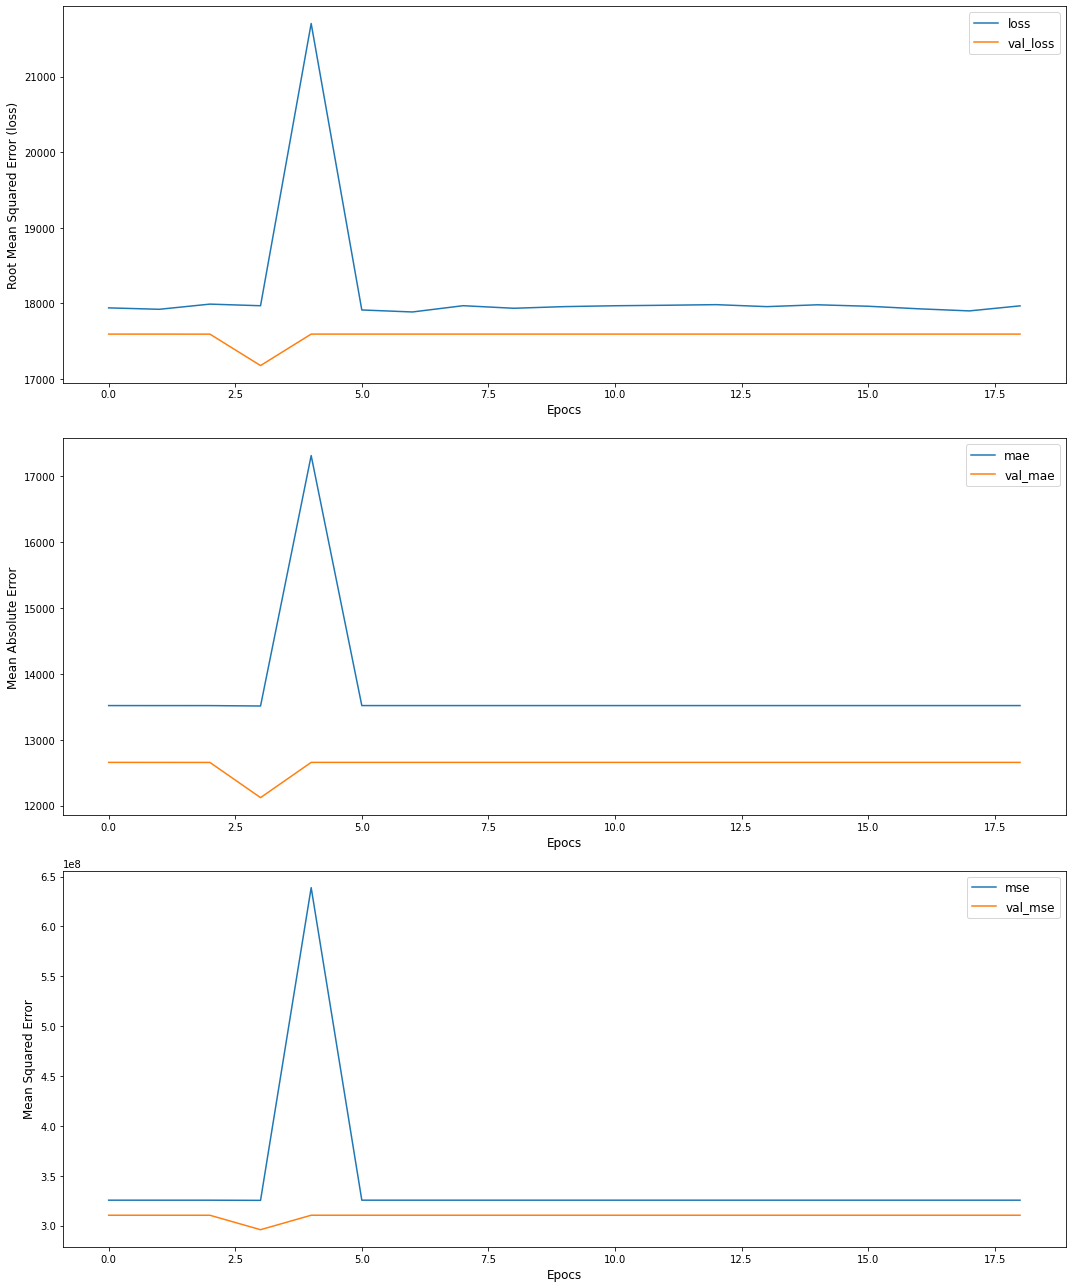

In [29]:
epoc_plots(history31)

In [26]:
y_pred31 = model31.predict(X_test)
r2_score(y_test, y_pred31) 

-0.9540507052601632

In [31]:
# https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
# I read the above thread entirely 
# I learnt few interesting things, 
# but none helpful for my case
# I still don't get why the model is not training
# !!!!
# The best idea that I can think of right now to focus on now 
# is that the dataset has some outliers.
# Let me try some normal looking NN archs to see if they learn

In [43]:
# param count: 379,501
model32 = Sequential() 

model32.add(Dense(500, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model32.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model32.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model32.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model32.compile(loss=root_mean_squared_error, optimizer=Adam(),
             metrics=['mse', 'mae'])

In [44]:
history32 = model32.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 49ms/step - loss: 17908.8711 - mse: 323983296.0000 - mae: 13464.9248 - val_loss: 17437.5020 - val_mse: 304897216.0000 - val_mae: 12455.1895
Epoch 2/300
14/14 [==============================] - 0s 17ms/step - loss: 17408.9238 - mse: 308211744.0000 - mae: 12897.6670 - val_loss: 16418.8652 - val_mse: 270357920.0000 - val_mae: 11110.6133
Epoch 3/300
14/14 [==============================] - 0s 17ms/step - loss: 15324.3398 - mse: 240241808.0000 - mae: 10251.5049 - val_loss: 12908.5117 - val_mse: 167176656.0000 - val_mae: 7348.2319
Epoch 4/300
14/14 [==============================] - 0s 18ms/step - loss: 11868.9648 - mse: 142481568.0000 - mae: 8892.3086 - val_loss: 11832.8281 - val_mse: 140243696.0000 - val_mae: 10353.4102
Epoch 5/300
14/14 [==============================] - 0s 18ms/step - loss: 11371.8193 - mse: 131835160.0000 - mae: 9281.1484 - val_loss: 11437.4512 - val_mse: 131154744.0000 - val_mae: 8179.2612
Epoch 6/300
14/14 [=====

14/14 [==============================] - 0s 16ms/step - loss: 6517.5547 - mse: 43211444.0000 - mae: 4813.1572 - val_loss: 6426.7700 - val_mse: 41507356.0000 - val_mae: 4120.8135
Epoch 44/300
14/14 [==============================] - 0s 13ms/step - loss: 6494.9214 - mse: 42506360.0000 - mae: 4610.6152 - val_loss: 6301.9531 - val_mse: 39907400.0000 - val_mae: 4995.5645
Epoch 45/300
14/14 [==============================] - 0s 13ms/step - loss: 6344.2676 - mse: 40760876.0000 - mae: 4491.4810 - val_loss: 6144.6943 - val_mse: 37947204.0000 - val_mae: 4607.0200
Epoch 46/300
14/14 [==============================] - 0s 14ms/step - loss: 6382.4087 - mse: 41278140.0000 - mae: 4608.2798 - val_loss: 6420.6768 - val_mse: 41422848.0000 - val_mae: 3568.9526
Epoch 47/300
14/14 [==============================] - 0s 13ms/step - loss: 6595.9565 - mse: 44123096.0000 - mae: 4544.3032 - val_loss: 6556.7251 - val_mse: 43197780.0000 - val_mae: 3562.9080
Epoch 48/300
14/14 [==============================] - 0s 1

Epoch 86/300
14/14 [==============================] - 0s 14ms/step - loss: 5938.7432 - mse: 35910048.0000 - mae: 3951.3516 - val_loss: 5638.2471 - val_mse: 31971964.0000 - val_mae: 3958.1921
Epoch 87/300
14/14 [==============================] - 0s 18ms/step - loss: 5911.0781 - mse: 35444396.0000 - mae: 3939.2976 - val_loss: 5599.9888 - val_mse: 31542922.0000 - val_mae: 3851.2781
Epoch 88/300
14/14 [==============================] - 0s 16ms/step - loss: 5928.6289 - mse: 36086292.0000 - mae: 3888.5203 - val_loss: 5612.0361 - val_mse: 31680710.0000 - val_mae: 3840.0344
Epoch 89/300
14/14 [==============================] - 0s 13ms/step - loss: 5857.5234 - mse: 35290648.0000 - mae: 3909.1448 - val_loss: 5695.3394 - val_mse: 32638194.0000 - val_mae: 3389.0740
Epoch 90/300
14/14 [==============================] - 0s 19ms/step - loss: 5828.1895 - mse: 34752908.0000 - mae: 3857.2900 - val_loss: 5813.6660 - val_mse: 34014000.0000 - val_mae: 3104.0615
Epoch 91/300
14/14 [=========================

Epoch 129/300
14/14 [==============================] - 0s 19ms/step - loss: 5639.0386 - mse: 32132778.0000 - mae: 3581.0134 - val_loss: 5353.3872 - val_mse: 28860260.0000 - val_mae: 3683.1096
Epoch 130/300
14/14 [==============================] - 0s 17ms/step - loss: 5606.9072 - mse: 32481314.0000 - mae: 3593.9851 - val_loss: 5317.5444 - val_mse: 28481186.0000 - val_mae: 3692.8057
Epoch 131/300
14/14 [==============================] - 0s 19ms/step - loss: 5581.3569 - mse: 32120260.0000 - mae: 3558.1150 - val_loss: 5281.4673 - val_mse: 28109166.0000 - val_mae: 3335.0125
Epoch 132/300
14/14 [==============================] - 0s 14ms/step - loss: 5542.7808 - mse: 31537784.0000 - mae: 3674.7500 - val_loss: 5404.4722 - val_mse: 29454410.0000 - val_mae: 3061.6396
Epoch 133/300
14/14 [==============================] - 0s 14ms/step - loss: 5544.3628 - mse: 31825278.0000 - mae: 3616.4678 - val_loss: 5437.7134 - val_mse: 29816576.0000 - val_mae: 2919.6118
Epoch 134/300
14/14 [===================

14/14 [==============================] - 0s 25ms/step - loss: 5434.9741 - mse: 30079912.0000 - mae: 3371.9490 - val_loss: 5347.0146 - val_mse: 28890318.0000 - val_mae: 2709.3450
Epoch 172/300
14/14 [==============================] - 0s 23ms/step - loss: 5392.0000 - mse: 29634910.0000 - mae: 3602.7244 - val_loss: 5406.6885 - val_mse: 29535712.0000 - val_mae: 2689.1875
Epoch 173/300
14/14 [==============================] - 0s 21ms/step - loss: 5420.8867 - mse: 29929896.0000 - mae: 3266.5928 - val_loss: 5307.1299 - val_mse: 28450132.0000 - val_mae: 3177.9790
Epoch 174/300
14/14 [==============================] - 0s 16ms/step - loss: 5269.8115 - mse: 28452512.0000 - mae: 3503.4551 - val_loss: 5046.9941 - val_mse: 25740272.0000 - val_mae: 2731.6731
Epoch 175/300
14/14 [==============================] - 0s 17ms/step - loss: 5286.3184 - mse: 28706474.0000 - mae: 3209.9053 - val_loss: 5047.1304 - val_mse: 25693942.0000 - val_mae: 3500.9512
Epoch 176/300
14/14 [==============================] -

Epoch 214/300
14/14 [==============================] - 0s 13ms/step - loss: 5032.3452 - mse: 26410168.0000 - mae: 3117.0596 - val_loss: 4848.4575 - val_mse: 23766740.0000 - val_mae: 2828.7808
Epoch 215/300
14/14 [==============================] - 0s 13ms/step - loss: 5144.4038 - mse: 27252178.0000 - mae: 3143.5789 - val_loss: 4734.8232 - val_mse: 22628612.0000 - val_mae: 2885.7471
Epoch 216/300
14/14 [==============================] - 0s 17ms/step - loss: 4998.9517 - mse: 26431174.0000 - mae: 2961.3047 - val_loss: 4784.2954 - val_mse: 23087468.0000 - val_mae: 3231.2808
Epoch 217/300
14/14 [==============================] - 0s 16ms/step - loss: 5054.4888 - mse: 26052132.0000 - mae: 3168.3831 - val_loss: 4712.0068 - val_mse: 22397106.0000 - val_mae: 2941.0464
Epoch 218/300
14/14 [==============================] - 0s 14ms/step - loss: 4978.2622 - mse: 25774856.0000 - mae: 3099.4001 - val_loss: 4728.4780 - val_mse: 22541990.0000 - val_mae: 2750.3972
Epoch 219/300
14/14 [===================

Epoch 257/300
14/14 [==============================] - 1s 36ms/step - loss: 5126.7505 - mse: 27489520.0000 - mae: 2868.6724 - val_loss: 4831.3091 - val_mse: 23628872.0000 - val_mae: 2825.3931
Epoch 258/300
14/14 [==============================] - 1s 38ms/step - loss: 4964.3657 - mse: 25417528.0000 - mae: 2928.7385 - val_loss: 4740.1074 - val_mse: 22725558.0000 - val_mae: 2852.0110
Epoch 259/300
14/14 [==============================] - 0s 14ms/step - loss: 4874.4653 - mse: 24638492.0000 - mae: 2883.3225 - val_loss: 4693.6738 - val_mse: 22269062.0000 - val_mae: 2528.3899
Epoch 260/300
14/14 [==============================] - 0s 27ms/step - loss: 4873.0693 - mse: 24735516.0000 - mae: 3009.8313 - val_loss: 4764.3398 - val_mse: 22967640.0000 - val_mae: 2826.7178
Epoch 261/300
14/14 [==============================] - 0s 21ms/step - loss: 5268.4341 - mse: 28559142.0000 - mae: 3027.3643 - val_loss: 5156.8237 - val_mse: 26921350.0000 - val_mae: 2607.5427
Epoch 262/300
14/14 [===================

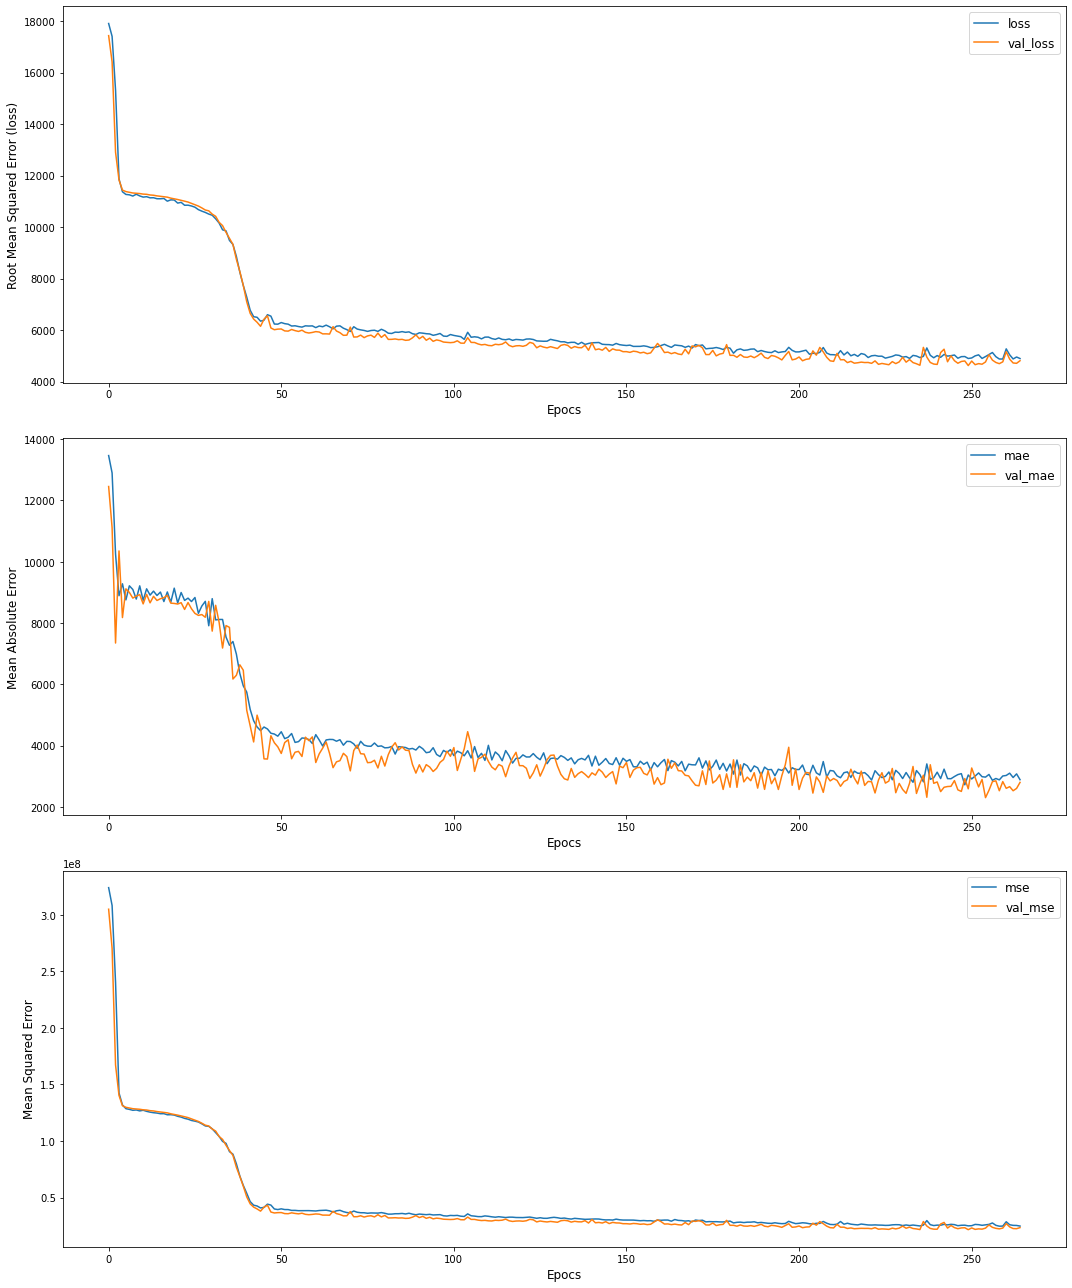

In [45]:
epoc_plots(history32)

In [46]:
y_pred32 = model32.predict(X_test)
r2_score(y_test, y_pred32) 

0.861292300963752

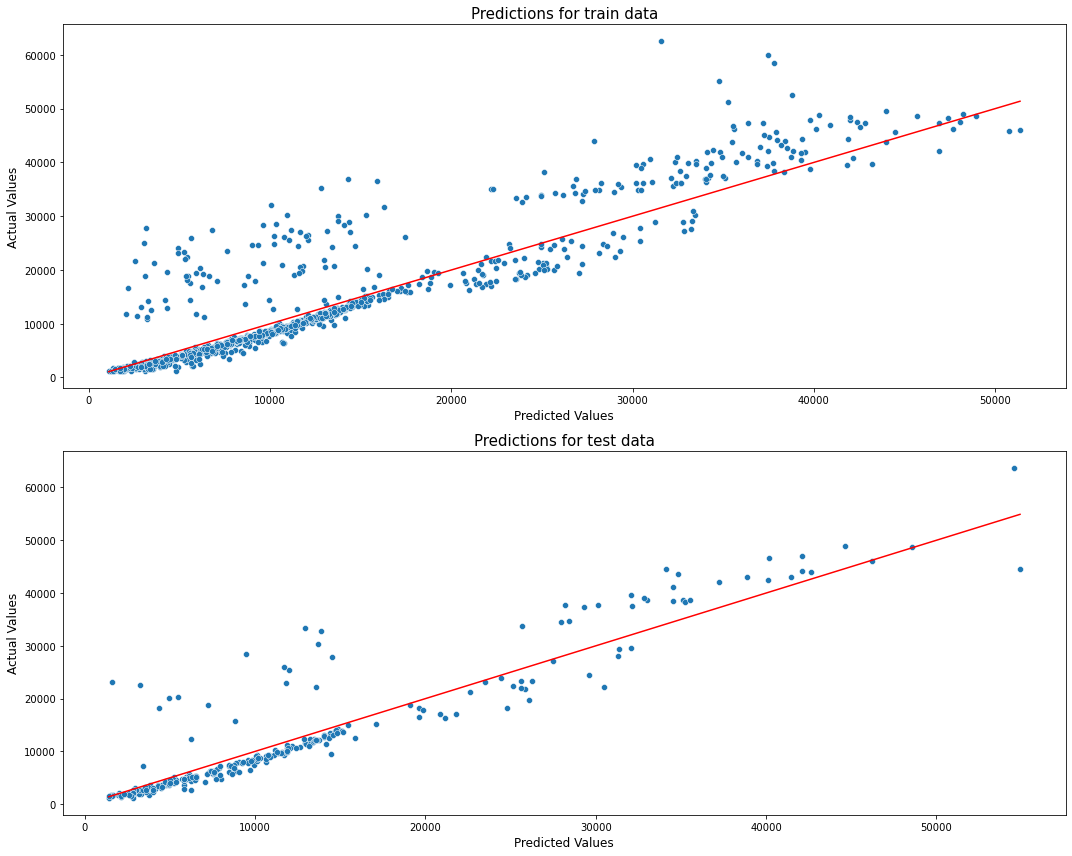

In [52]:
regression_plots(y_pred32, model32)

In [53]:
check_min_max(y_pred32)

Predicted values

max: 54905.0078125
min: 1412.8692626953125

Actual values

max: 63770.42801
min: 1131.5066


In [54]:
# this is actually a moderately good model 
# let me try some more 'normal' looking models

In [55]:
# param count: 253,001
model33 = Sequential() 

model33.add(Dense(250, input_dim=6, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model33.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model33.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model33.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model33.add(Dense(250, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model33.add(Dense(1, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))

model33.compile(loss=root_mean_squared_error, optimizer=Adam(),
             metrics=['mse', 'mae'])

In [57]:
history33 = model33.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 1s 59ms/step - loss: 17882.2891 - mse: 324850400.0000 - mae: 13495.7197 - val_loss: 17488.1816 - val_mse: 306669536.0000 - val_mae: 12520.8369
Epoch 2/300
14/14 [==============================] - 0s 18ms/step - loss: 17236.5820 - mse: 301049120.0000 - mae: 12582.5898 - val_loss: 14916.8691 - val_mse: 223203072.0000 - val_mae: 9190.0186
Epoch 3/300
14/14 [==============================] - 0s 24ms/step - loss: 12515.1416 - mse: 159925472.0000 - mae: 9469.6650 - val_loss: 11670.9443 - val_mse: 136447648.0000 - val_mae: 10016.9463
Epoch 4/300
14/14 [==============================] - 0s 25ms/step - loss: 11436.0020 - mse: 133962088.0000 - mae: 8381.1650 - val_loss: 11370.3086 - val_mse: 129588616.0000 - val_mae: 8591.8828
Epoch 5/300
14/14 [==============================] - 0s 22ms/step - loss: 11314.7158 - mse: 129010232.0000 - mae: 9419.0264 - val_loss: 11350.3281 - val_mse: 129134400.0000 - val_mae: 8558.8584
Epoch 6/300
14/14 [=======

14/14 [==============================] - 0s 17ms/step - loss: 5958.0376 - mse: 36353860.0000 - mae: 3984.3381 - val_loss: 5807.8760 - val_mse: 33919472.0000 - val_mae: 3403.4983
Epoch 44/300
14/14 [==============================] - 0s 16ms/step - loss: 5973.8311 - mse: 36453660.0000 - mae: 3957.5696 - val_loss: 5811.3364 - val_mse: 33963936.0000 - val_mae: 3318.5803
Epoch 45/300
14/14 [==============================] - 0s 13ms/step - loss: 6024.3848 - mse: 36969220.0000 - mae: 3817.6768 - val_loss: 5742.3901 - val_mse: 33145988.0000 - val_mae: 4156.1318
Epoch 46/300
14/14 [==============================] - 0s 17ms/step - loss: 6043.3960 - mse: 37000940.0000 - mae: 4149.9580 - val_loss: 5678.5308 - val_mse: 32427816.0000 - val_mae: 3749.3721
Epoch 47/300
14/14 [==============================] - 0s 17ms/step - loss: 6012.5449 - mse: 37089296.0000 - mae: 4075.6624 - val_loss: 5721.2319 - val_mse: 32916760.0000 - val_mae: 3168.8025
Epoch 48/300
14/14 [==============================] - 0s 1

Epoch 86/300
14/14 [==============================] - 0s 14ms/step - loss: 5550.2910 - mse: 31149076.0000 - mae: 3585.8625 - val_loss: 5283.0200 - val_mse: 28127228.0000 - val_mae: 2901.7214
Epoch 87/300
14/14 [==============================] - 0s 14ms/step - loss: 5463.3530 - mse: 30326012.0000 - mae: 3322.0308 - val_loss: 5265.6465 - val_mse: 27939966.0000 - val_mae: 3135.0020
Epoch 88/300
14/14 [==============================] - 0s 15ms/step - loss: 5408.5557 - mse: 30073468.0000 - mae: 3592.5459 - val_loss: 5272.3540 - val_mse: 28041282.0000 - val_mae: 2810.6741
Epoch 89/300
14/14 [==============================] - 0s 13ms/step - loss: 5408.3848 - mse: 30523074.0000 - mae: 3314.5479 - val_loss: 5187.6685 - val_mse: 27076508.0000 - val_mae: 3577.7554
Epoch 90/300
14/14 [==============================] - 0s 13ms/step - loss: 5564.3481 - mse: 31999942.0000 - mae: 3575.4534 - val_loss: 5451.1123 - val_mse: 29875322.0000 - val_mae: 4369.9678
Epoch 91/300
14/14 [=========================

Epoch 129/300
14/14 [==============================] - 0s 15ms/step - loss: 5004.0547 - mse: 25864158.0000 - mae: 2945.5398 - val_loss: 4815.3413 - val_mse: 23412134.0000 - val_mae: 2738.0427
Epoch 130/300
14/14 [==============================] - 0s 23ms/step - loss: 5036.5630 - mse: 25738050.0000 - mae: 2998.7625 - val_loss: 4748.9453 - val_mse: 22707964.0000 - val_mae: 3256.1768
Epoch 131/300
14/14 [==============================] - 0s 16ms/step - loss: 5137.3936 - mse: 26876260.0000 - mae: 3234.4346 - val_loss: 4787.4624 - val_mse: 23125152.0000 - val_mae: 2501.7852
Epoch 132/300
14/14 [==============================] - 0s 14ms/step - loss: 4972.6074 - mse: 25308542.0000 - mae: 2948.4106 - val_loss: 4780.4023 - val_mse: 23105782.0000 - val_mae: 2733.9399
Epoch 133/300
14/14 [==============================] - 0s 13ms/step - loss: 4991.4634 - mse: 25431258.0000 - mae: 2974.6917 - val_loss: 4851.9595 - val_mse: 23799796.0000 - val_mae: 2825.6812
Epoch 134/300
14/14 [===================

14/14 [==============================] - 0s 14ms/step - loss: 4842.6909 - mse: 23948422.0000 - mae: 2722.5161 - val_loss: 4801.4990 - val_mse: 23376120.0000 - val_mae: 2279.5837
Epoch 172/300
14/14 [==============================] - 0s 13ms/step - loss: 4860.2178 - mse: 24454152.0000 - mae: 2870.6443 - val_loss: 4479.9497 - val_mse: 20304008.0000 - val_mae: 2857.7029


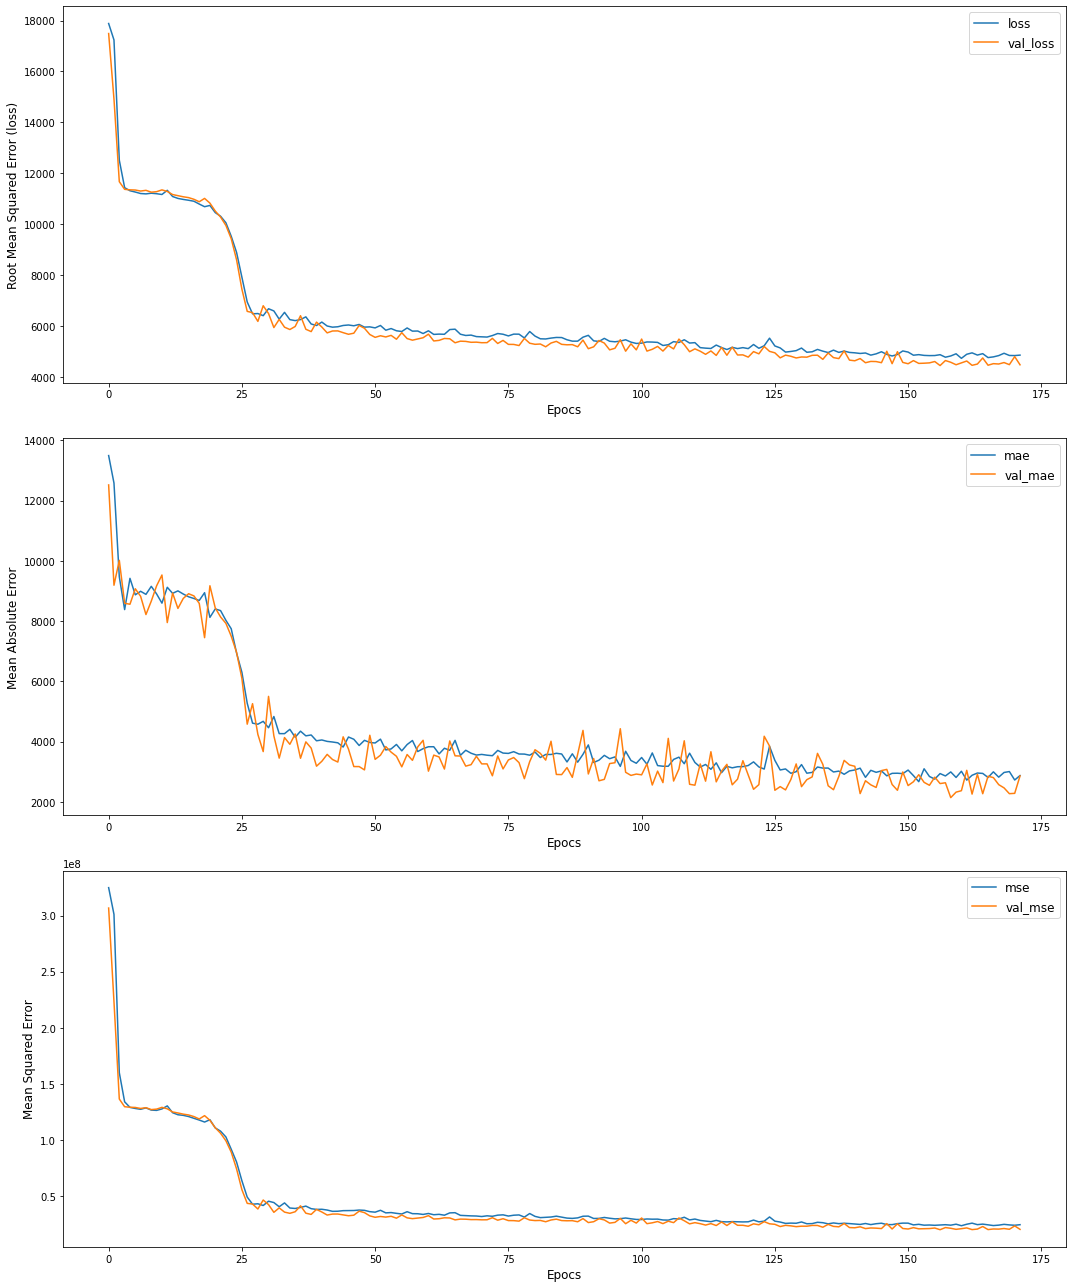

In [58]:
epoc_plots(history33)

In [59]:
y_pred33 = model33.predict(X_test)
r2_score(y_test, y_pred33) 

0.8656998204454405

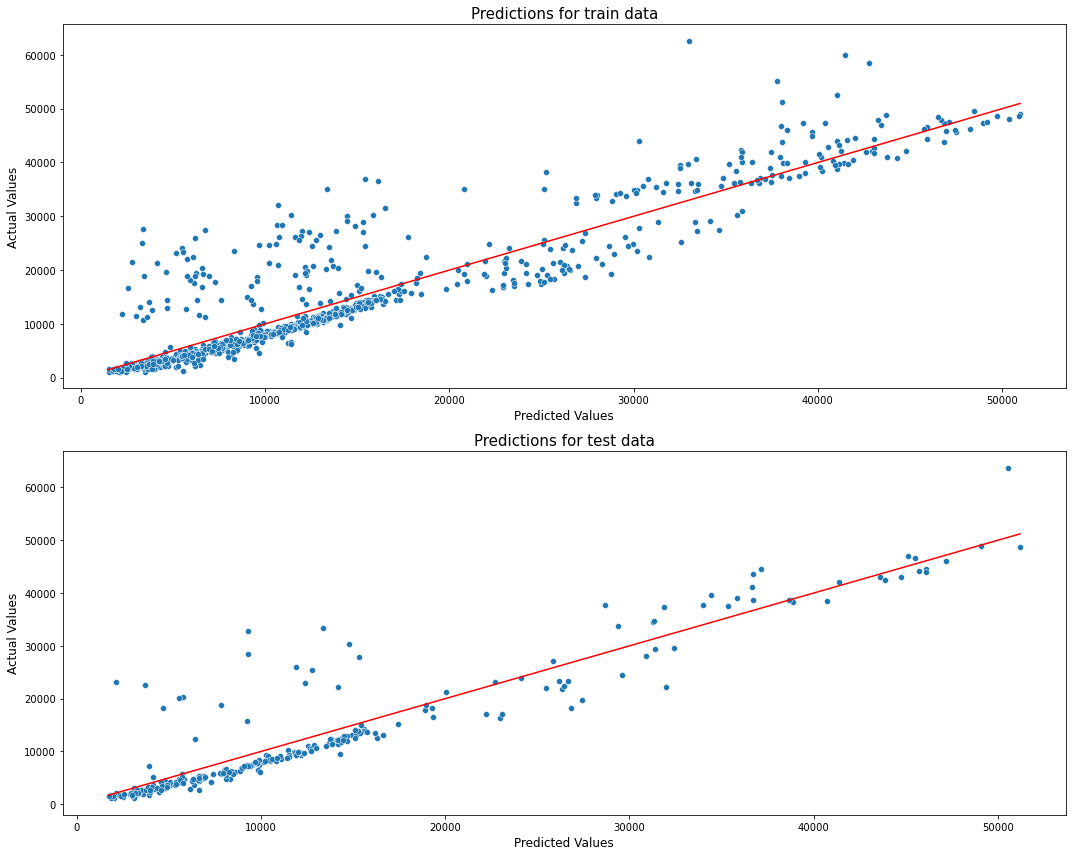

In [60]:
regression_plots(y_pred33, model33)

In [61]:
check_min_max(y_pred33)

Predicted values

max: 51204.12890625
min: 1726.439208984375

Actual values

max: 63770.42801
min: 1131.5066


In [62]:
# less params, slightly better r2 
# but max value decreased, still ok though

In [63]:
# I feel like I should be looking at the data that has higher error value
# alongside the outlier data 
# maybe they intersect? 

In [68]:
# OUTLIER ANALYSIS AHEAD (?)

In [69]:
dfe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='charges', ylabel='bmi'>

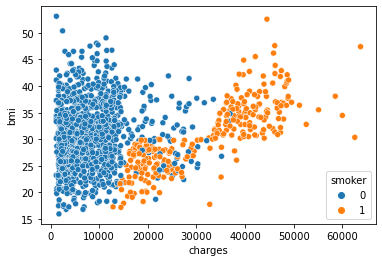

In [76]:
sns.scatterplot(dfe['charges'], dfe['bmi'], hue=dfe['smoker'])

<AxesSubplot:>

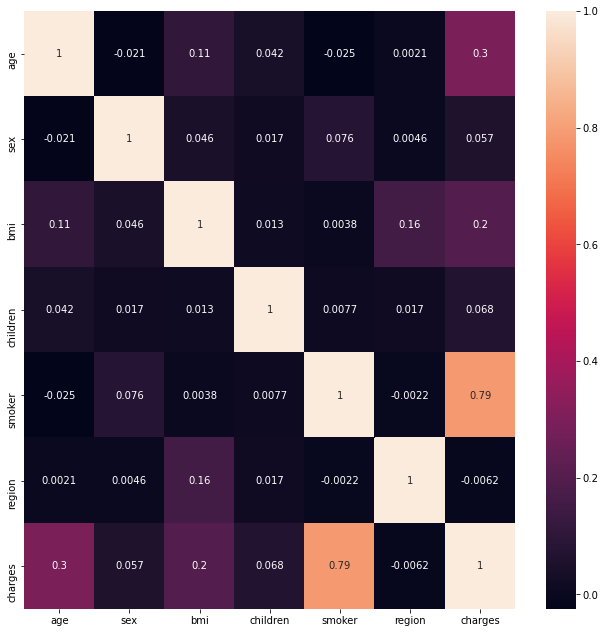

In [80]:
plt.figure(figsize=(11,11))
sns.heatmap(dfe.corr(), annot=True)